<a href="https://colab.research.google.com/github/JuanRosales707/md-lab01-RC/blob/main/LAB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO 8**
# **INTEGRANTES:**
## **ROSALES CASTRO, Juan Sebastian**
## **BUSTAMANTE GUERRA, Juan Antonio**

### **a. Lea la base de datos, realice imputaciones, tratamiento de outliers, transformaciones de datos y desbalance de clases en caso sea necesario. Además, separe la variable de clasificación del resto de variables para luego obtener los datos de entrenamiento y prueba, tomando de este último el 25% de datos.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/colab/cancer.csv")

In [4]:
#Eliminamos las columnas
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
ClumpThick         0
UnifCellSize       0
UnifCellShape      0
MargAdh            0
SingEpiCellSize    0
BareNuclei         0
BlandChromatin     0
NormalNucleoli     0
Mitoses            0
Class              0
dtype: int64


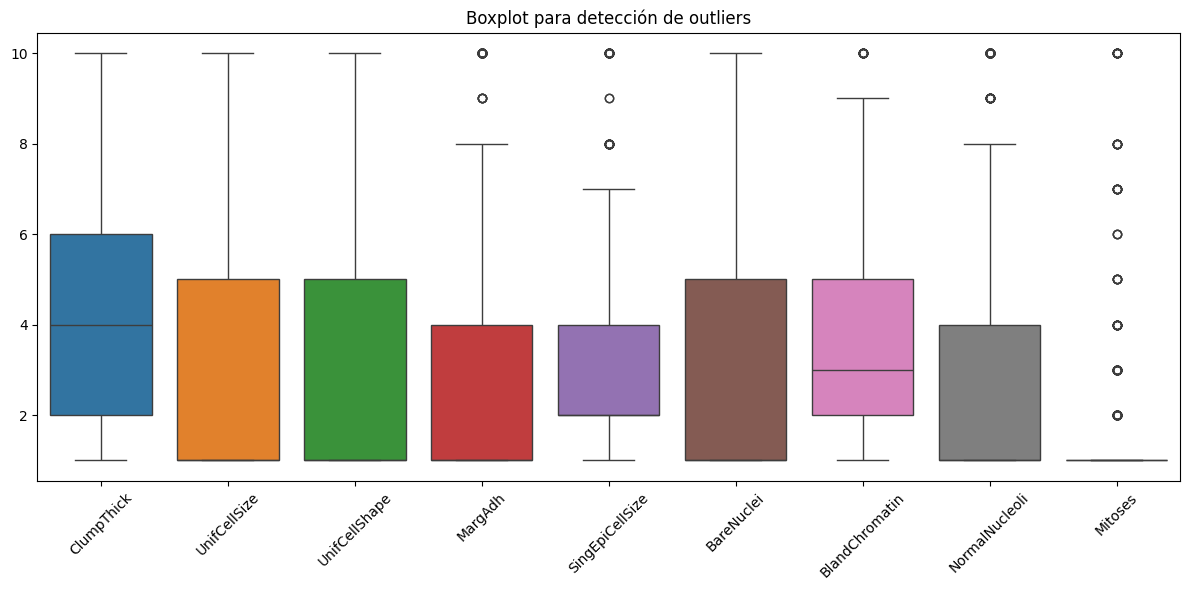

In [6]:
# Detección de outliers con boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["Class"]))
plt.title("Boxplot para detección de outliers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
# Tratamiento de outliers (recorte por percentil 1 y 99)
for col in df.columns[:-1]:  # Excluye la columna 'Class'
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    df[col] = df[col].clip(p1, p99)

In [8]:
# Escalar los datos (transformaciones)
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verificar desbalance de clases
print("\nConteo de clases:")
print(y.value_counts())


Conteo de clases:
Class
0    458
1    241
Name: count, dtype: int64


In [9]:
# Dividir en entrenamiento y prueba (75/25)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# Mostrar tamaños de los conjuntos
print("\nTamaño de los datos:")
print(f"Entrenamiento: {X_train.shape}")
print(f"Prueba: {X_test.shape}")


Tamaño de los datos:
Entrenamiento: (524, 9)
Prueba: (175, 9)


### **b. Genere el modelo de árbol de decisión para clasificación y la profundidad adecuada para este.  Además, calcule las métricas de clasificación e interprete sus resultados más importantes.**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [11]:
accuracies = []
depths = range(1, 21)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    accuracies.append(acc)

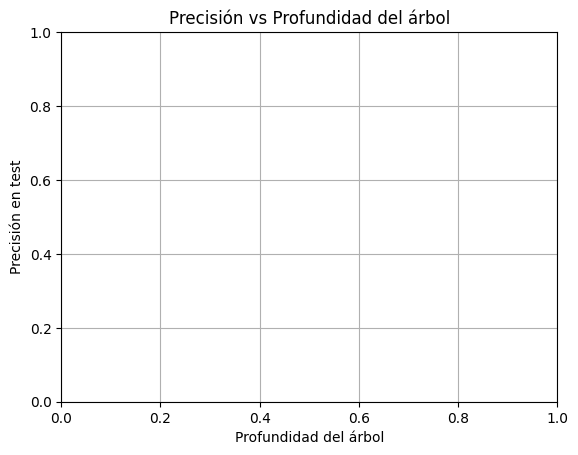

In [12]:
# Graficamos precisión vs profundidad
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión en test')
plt.title('Precisión vs Profundidad del árbol')
plt.grid(True)
plt.show()

In [13]:
# Elegir la mejor profundidad (máxima precisión)
mejor_profundidad = depths[np.argmax(accuracies)]
print(f"Mejor profundidad encontrada: {mejor_profundidad}")

Mejor profundidad encontrada: 3


In [14]:
modelo_arbol = DecisionTreeClassifier(max_depth=mejor_profundidad, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [15]:
# Predicción de los datos
y_pred = modelo_arbol.predict(X_test)

# Métricas de clasificación
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"Precisión general (Accuracy): {accuracy_score(y_test, y_pred):.4f}")


Matriz de confusión:
[[106   9]
 [  1  59]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95       115
           1       0.87      0.98      0.92        60

    accuracy                           0.94       175
   macro avg       0.93      0.95      0.94       175
weighted avg       0.95      0.94      0.94       175

Precisión general (Accuracy): 0.9429


### **c. Genere el modelo de bosques aleatorios para clasificación. Además, calcule las métricas de clasificación y compárelas con las del árbol de clasificación. ¿Hubo mejoras o no?**

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Crear y entrenar el modelo
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred_rf = modelo_rf.predict(X_test)

# Métricas de clasificación
print("\nMatriz de confusión - Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nReporte de clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print(f"Precisión general (Accuracy) - Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")


Matriz de confusión - Random Forest:
[[112   3]
 [  6  54]]

Reporte de clasificación - Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.95      0.90      0.92        60

    accuracy                           0.95       175
   macro avg       0.95      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175

Precisión general (Accuracy) - Random Forest: 0.9486


En resumen, sí hubo una mejora al usar Bosques Aleatorios, lo cual era de esperarse, ya que este tipo de modelo combina varios árboles de decisión, lo que ayuda a reducir errores y hace que el modelo sea más robusto y confiable.